# UNSUPERVISED LEARNING: K-MEANS CLUSTERING

### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture
from kneed import KneeLocator

### LOAD DATA

In [2]:
# Top Songs
top = pd.read_csv(r'./../top_tracks.csv')

# Spotify Dataset
data = pd.read_csv(r'./../final_full_list2.csv')

In [3]:
top

,track_id,song_title,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,59uQI0PADDKeE6UZDTJEe8,Last Night,Morgan Wallen,0.517,0.675,6,-5.382,1,0.0357,0.45900,0.000000,0.1510,0.518,203.853,59uQI0PADDKeE6UZDTJEe8,163855
1,1Lo0QY9cvc8sUB2vnIOxDT,Fast Car,Luke Combs,0.712,0.603,8,-5.520,1,0.0262,0.18600,0.000000,0.1150,0.670,97.994,1Lo0QY9cvc8sUB2vnIOxDT,265493
2,1s7oOCT8vauUh01PbJD6ps,Calm Down,Rema & Selena Gomez,0.799,0.802,11,-5.196,1,0.0371,0.42900,0.001280,0.1710,0.811,107.008,1s7oOCT8vauUh01PbJD6ps,239318
3,1s7oOCT8vauUh01PbJD6ps,Calm Down (with Selena Gomez),Rema,0.799,0.802,11,-5.196,1,0.0371,0.42900,0.001280,0.1710,0.811,107.008,1s7oOCT8vauUh01PbJD6ps,239318
4,0yLdNVWF3Srea0uzk55zFn,Flowers,Miley Cyrus,0.707,0.681,0,-4.325,1,0.0668,0.06320,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,4lIxdJw6W3Fg4vUIYCB0S5,Style,Taylor Swift,0.598,0.786,2,-5.572,1,0.0383,0.00253,0.001600,0.1170,0.456,95.019,4lIxdJw6W3Fg4vUIYCB0S5,231000
160,5IAESfJjmOYu7cHyX557kz,Take Two,BTS,0.617,0.589,7,-5.978,1,0.0345,0.02680,0.000000,0.3780,0.566,92.991,5IAESfJjmOYu7cHyX557kz,229953
161,3JvKfv6T31zO0ini8iNItO,Another Love,Tom Odell,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,3JvKfv6T31zO0ini8iNItO,244360
162,4FAKtPVycI4DxoOHC01YqD,Yandel 150,Yandel,0.783,0.729,6,-3.549,0,0.0691,0.04920,0.000272,0.1000,0.580,167.968,4FAKtPVycI4DxoOHC01YqD,216148


In [4]:
data

,track_id,track_name,artist_name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0gNNToCW3qjabgTyBSjt3H,!Que Vida! - Mono Version,Love,0.600,0.540,9,-11.803,1,0.0328,0.52500,0.003050,0.1000,0.547,125.898,220560
1,0tMgFpOrXZR6irEOLNWwJL,"""40""",U2,0.368,0.480,8,-11.605,1,0.0306,0.22800,0.707000,0.1590,0.338,150.166,157840
2,2ZywW3VyVx6rrlrX75n3JB,"""40"" - Live",U2,0.272,0.684,8,-9.728,1,0.0505,0.09980,0.014500,0.9460,0.279,143.079,226200
3,6DdWA7D1o5TU2kXWyCLcch,"""40"" - Remastered 2008",U2,0.371,0.545,8,-9.315,1,0.0307,0.18500,0.582000,0.1830,0.310,150.316,157667
4,3vMmwsAiLDCfyc1jl76lQE,"""40"" - Remastered 2008",U2,0.371,0.545,8,-9.315,1,0.0307,0.18500,0.582000,0.1830,0.310,150.316,157667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174035,7JSH9jmLF2BfoZmYlQq5I0,Physical,Dua Lipa,0.643,0.813,0,-4.819,1,0.0492,0.01680,0.000344,0.1030,0.747,146.983,193829
174036,4de1X6v99U7tfOXrNUCTbi,Candy,Doja Cat,0.689,0.516,8,-5.857,1,0.0444,0.51300,0.000000,0.1680,0.209,124.876,190907
174037,1GVF9369j7InydwGztCDIZ,Good In Goodbye,Madison Beer,0.658,0.698,11,-5.950,0,0.1770,0.43300,0.000000,0.1740,0.456,139.054,141949
174038,6qNB2ChCVPepl5ZjVJJTUW,STUPID (feat. Yung Baby Tate),Ashnikko,0.772,0.637,2,-6.881,1,0.1140,0.00459,0.000000,0.0778,0.540,149.906,167317


### GET NUMERICAL FEATURES FOR SCALING

In [5]:
top_nums = top.select_dtypes(np.number)
data_nums = data.select_dtypes(np.number)

In [6]:
top_nums.columns, data_nums.columns # we don't need the duration so we can drop this on both dfs

(Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms'],
       dtype='object'),
 Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'duration_ms'],
       dtype='object'))

In [7]:
top_nums.drop("duration_ms", axis=1, inplace=True)
data_nums.drop("duration_ms", axis=1, inplace=True)

In [8]:
top_nums.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.668890,0.641403,5.432927,-6.592238,0.530488,0.098019,0.259485,0.041628,0.165896,0.517123,125.912744
std,0.145903,0.152566,3.536195,2.666603,0.500598,0.100280,0.231773,0.170534,0.113956,0.227812,30.704891
min,0.063000,0.061100,0.000000,-26.901000,0.000000,0.024800,0.000174,0.000000,0.032200,0.038000,56.664000
25%,0.572250,0.537750,2.000000,-7.839000,0.000000,0.036625,0.068225,0.000000,0.099525,0.366500,100.042750
50%,0.674500,0.647000,6.000000,-6.188000,1.000000,0.053650,0.187500,0.000001,0.115000,0.508000,125.554500
75%,0.783000,0.738000,9.000000,-5.015250,1.000000,0.100000,0.426750,0.000080,0.191250,0.694500,143.272250
max,0.954000,0.988000,11.000000,-0.517000,1.000000,0.491000,0.977000,0.974000,0.685000,0.963000,203.853000


In [9]:
data_nums.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,174040.000000,174040.000000,174040.000000,174040.000000,174040.000000,174040.000000,174040.000000,174040.000000,174040.000000,174040.000000,174040.000000
mean,0.539386,0.491853,5.203562,-11.318403,0.705522,0.093972,0.488534,0.165375,0.206902,0.530258,117.058587
std,0.175237,0.268204,3.517539,5.658198,0.455809,0.148976,0.376981,0.312228,0.176816,0.262338,30.653184
min,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419000,0.265000,2.000000,-14.405250,0.000000,0.035000,0.089300,0.000000,0.098400,0.320000,93.662000
50%,0.549000,0.484000,5.000000,-10.402000,1.000000,0.045200,0.482000,0.000217,0.135000,0.542000,115.010000
75%,0.669000,0.714000,8.000000,-7.083000,1.000000,0.075800,0.884000,0.096700,0.263000,0.747000,135.740500
max,0.988000,1.000000,11.000000,3.855000,1.000000,0.969000,0.996000,1.000000,1.000000,1.000000,244.091000


#### SCALE DATA

In [11]:
def scaler(df):
    df_scaled = StandardScaler().fit_transform(df)
    df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
    return df_scaled

In [12]:
top_scaled = scaler(top_nums)
top_scaled.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.044226,0.220887,0.160854,0.455240,0.940775,-0.623355,0.863458,-0.244851,-0.131115,0.003861,2.546141
1,0.296374,-0.252485,0.728166,0.403330,0.940775,-0.718380,-0.318027,-0.244851,-0.447993,0.673121,-0.912045
2,0.894488,1.055864,1.579133,0.525205,0.940775,-0.609351,0.733625,-0.237322,0.044929,1.293948,-0.617577
3,0.894488,1.055864,1.579133,0.525205,0.940775,-0.609351,0.733625,-0.237322,0.044929,1.293948,-0.617577
4,0.262000,0.260335,-1.541082,0.852838,0.940775,-0.312272,-0.849480,-0.244821,-1.176813,0.567448,-0.258525


In [13]:
top_scaled.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,164.000000,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02,1.640000e+02
mean,1.408088e-16,-4.332578e-17,8.123583e-17,-7.582011e-17,0.000000,-4.332578e-17,8.123583e-18,-3.114040e-17,1.191459e-16,-6.498866e-17,2.166289e-16
std,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00,1.003063e+00
min,-4.165419e+00,-3.815271e+00,-1.541082e+00,-7.639293e+00,-1.062953,-7.323837e-01,-1.122243e+00,-2.448513e-01,-1.176813e+00,-2.109593e+00,-2.262208e+00
25%,-6.643894e-01,-6.814792e-01,-9.737701e-01,-4.689789e-01,-1.062953,-6.141023e-01,-8.277325e-01,-2.448513e-01,-5.842066e-01,-6.631981e-01,-8.451171e-01
50%,3.856636e-02,3.679782e-02,1.608537e-01,1.520571e-01,0.940775,-4.438070e-01,-3.115358e-01,-2.448442e-01,-4.479930e-01,-4.016958e-02,-1.170306e-02
75%,7.844901e-01,6.350881e-01,1.011822e+00,5.931958e-01,0.940775,1.981624e-02,7.238871e-01,-2.443826e-01,2.231726e-01,7.809952e-01,5.670977e-01
max,1.960093e+00,2.278743e+00,1.579133e+00,2.285246e+00,0.940775,3.930856e+00,3.105251e+00,5.484119e+00,4.569245e+00,1.963208e+00,2.546141e+00


In [14]:
data_scaled = scaler(data_nums)
data_scaled.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1.740400e+05,1.740400e+05,1.740400e+05,1.740400e+05,1.740400e+05,1.740400e+05,1.740400e+05,1.740400e+05,1.740400e+05,1.740400e+05,1.740400e+05
mean,-4.899168e-17,9.406403e-17,-1.185599e-16,2.449584e-16,-2.743534e-17,-9.145115e-18,-3.396757e-16,1.058220e-16,-1.427291e-16,-8.687859e-17,-1.740838e-16
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-3.078053e+00,-1.833883e+00,-1.479323e+00,-8.603752e+00,-1.547849e+00,-6.307914e-01,-1.295915e+00,-5.296622e-01,-1.170158e+00,-2.021283e+00,-3.818818e+00
25%,-6.869924e-01,-8.458254e-01,-9.107424e-01,-5.455545e-01,-1.547849e+00,-3.958530e-01,-1.059033e+00,-5.296622e-01,-6.136463e-01,-8.014795e-01,-7.632699e-01
50%,5.486397e-02,-2.928000e-02,-5.787086e-02,1.619607e-01,6.460579e-01,-3.273853e-01,-1.733370e-02,-5.289672e-01,-4.066512e-01,4.475916e-02,-6.683132e-02
75%,7.396545e-01,8.282791e-01,7.950007e-01,7.485449e-01,6.460579e-01,-1.219821e-01,1.049035e+00,-2.199513e-01,3.172661e-01,8.261957e-01,6.094625e-01
max,2.560056e+00,1.894635e+00,1.647872e+00,2.681675e+00,6.460579e-01,5.873644e+00,1.346133e+00,2.673140e+00,4.485446e+00,1.790603e+00,4.144195e+00


### K-MEANS CLUSTERING

#### FINDING THE BEST K

##### Functions

In [13]:
# Function to find the elbow which would determine the best k
def elbow_plot(df_scaled, start, end):
    """Create elbow plot from scaled data"""
    
    sse = {}
    
    for k in range(start, end):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df_scaled)
        sse[k] = kmeans.inertia_
    
    fig = plt.figure(figsize = (18,10))
    
    plt.title('Elbow plot for K selection')
    plt.xlabel('k')
    plt.ylabel('SSE')
    plot =  sns.pointplot(x=list(sse.keys()),
                 y=list(sse.values()))    
    
    plt.tight_layout()
    plt.show()
    

In [15]:
# another plot using kneed library with the elbow point specified
def find_k(df_scaled, start, end):
    """Find the optimum k clusters"""
    
    sse = {}
    
    for k in range(start, end):
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df_scaled)
        sse[k] = kmeans.inertia_
    
    kn = KneeLocator(x=list(sse.keys()), 
                 y=list(sse.values()), 
                 curve='convex', 
                 direction='decreasing')
    kn.plot_knee(figsize = ([18,10]), xlabel = "k", ylabel = "SSE")
    k = kn.knee
    return k

#### SCALED DATA

In [16]:
elbow_plot(top_scaled, 2, 21)

NameError: name 'elbow_plot' is not defined

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

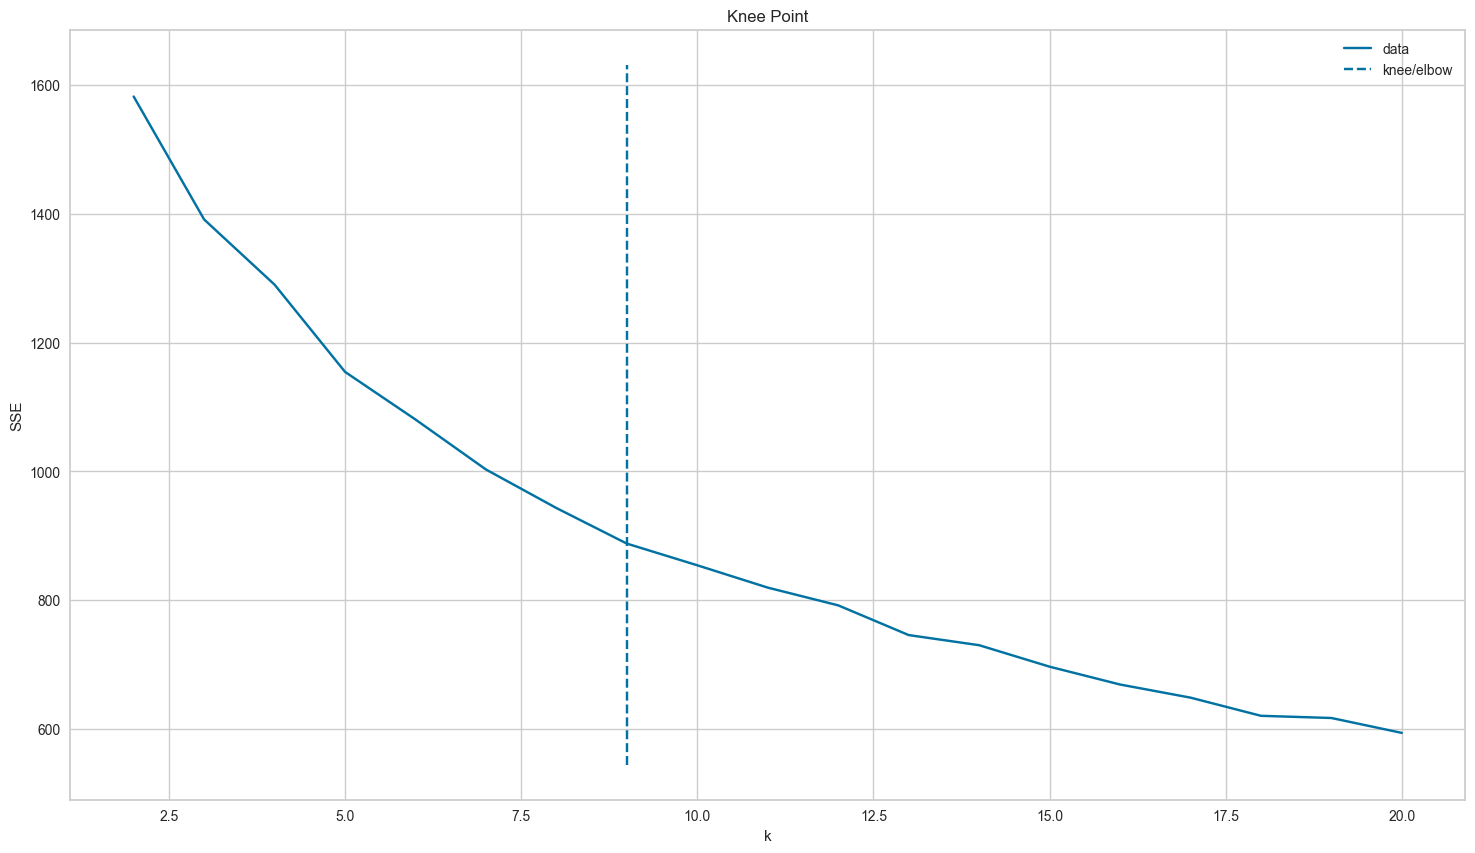

In [15]:
top_k = find_k(top_scaled, 2, 21)

In [149]:
top_k

9

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

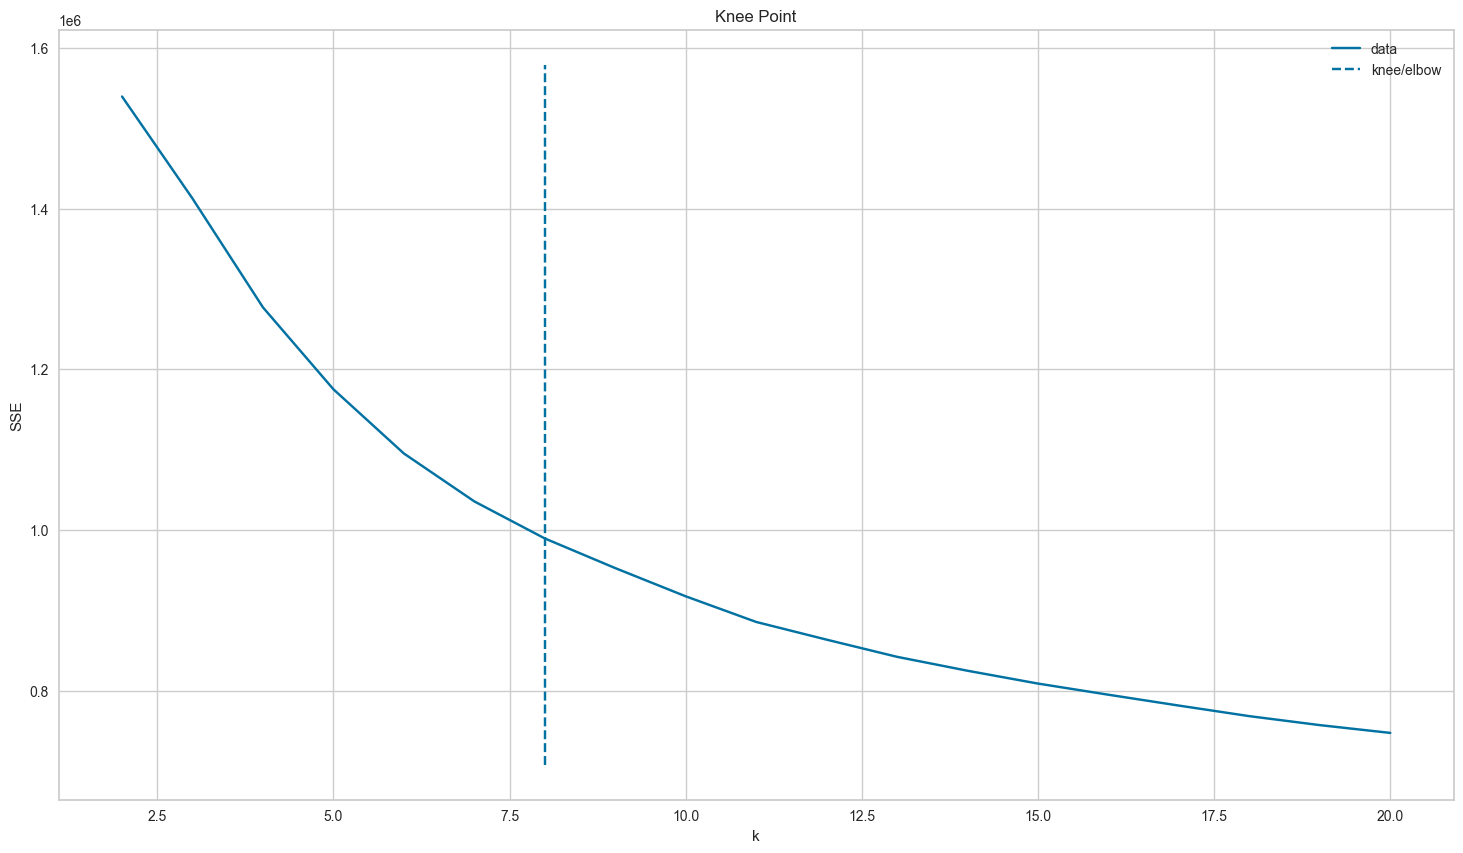

In [17]:
data_k = find_k(data_scaled, 2, 21)

In [18]:
data_k

8

##### SCALED PCA(2) DATASET

In [19]:
pca = PCA(2) 
top_2D = pca.fit_transform(top_scaled)
top_2D

array([[-1.56627872e-01, -9.57085814e-01],
       [-4.67317472e-01, -2.34803877e-01],
       [-1.31181726e+00, -9.72185716e-01],
       [-1.31181726e+00, -9.72185716e-01],
       [-8.41847043e-01,  1.09799232e+00],
       [ 1.90799618e-01,  2.98599193e+00],
       [ 1.52458615e+00,  1.61252820e+00],
       [-3.57466215e-01,  8.43850376e-01],
       [-3.04688360e-01, -8.52645846e-01],
       [ 8.39807310e-01,  4.79342229e-01],
       [ 8.39807310e-01,  4.79342229e-01],
       [ 5.17591175e+00, -1.46326647e+00],
       [-8.19722242e-02, -5.45655105e-01],
       [-6.84983796e-02,  1.48247082e-01],
       [ 4.70778602e-01,  4.66241153e-01],
       [ 3.86611787e+00, -1.22160245e-01],
       [ 9.78169680e+00,  2.19951201e-01],
       [-1.60955277e-01,  8.67240294e-01],
       [-1.60955277e-01,  8.67240294e-01],
       [-1.15461766e+00, -8.09669065e-01],
       [-8.04004789e-01, -2.83960543e-01],
       [-1.95325257e-01,  2.65555378e+00],
       [-1.95325257e-01,  2.65555378e+00],
       [-1.

In [20]:
data_2D = pca.fit_transform(data_scaled)
data_2D

array([[-0.31938605,  0.08663855],
       [ 0.62073566, -1.61131978],
       [-0.67496301, -2.43814953],
       ...,
       [-1.41447181,  0.30699531],
       [-1.92864788,  0.07770241],
       [-2.27481004, -0.80041912]])

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

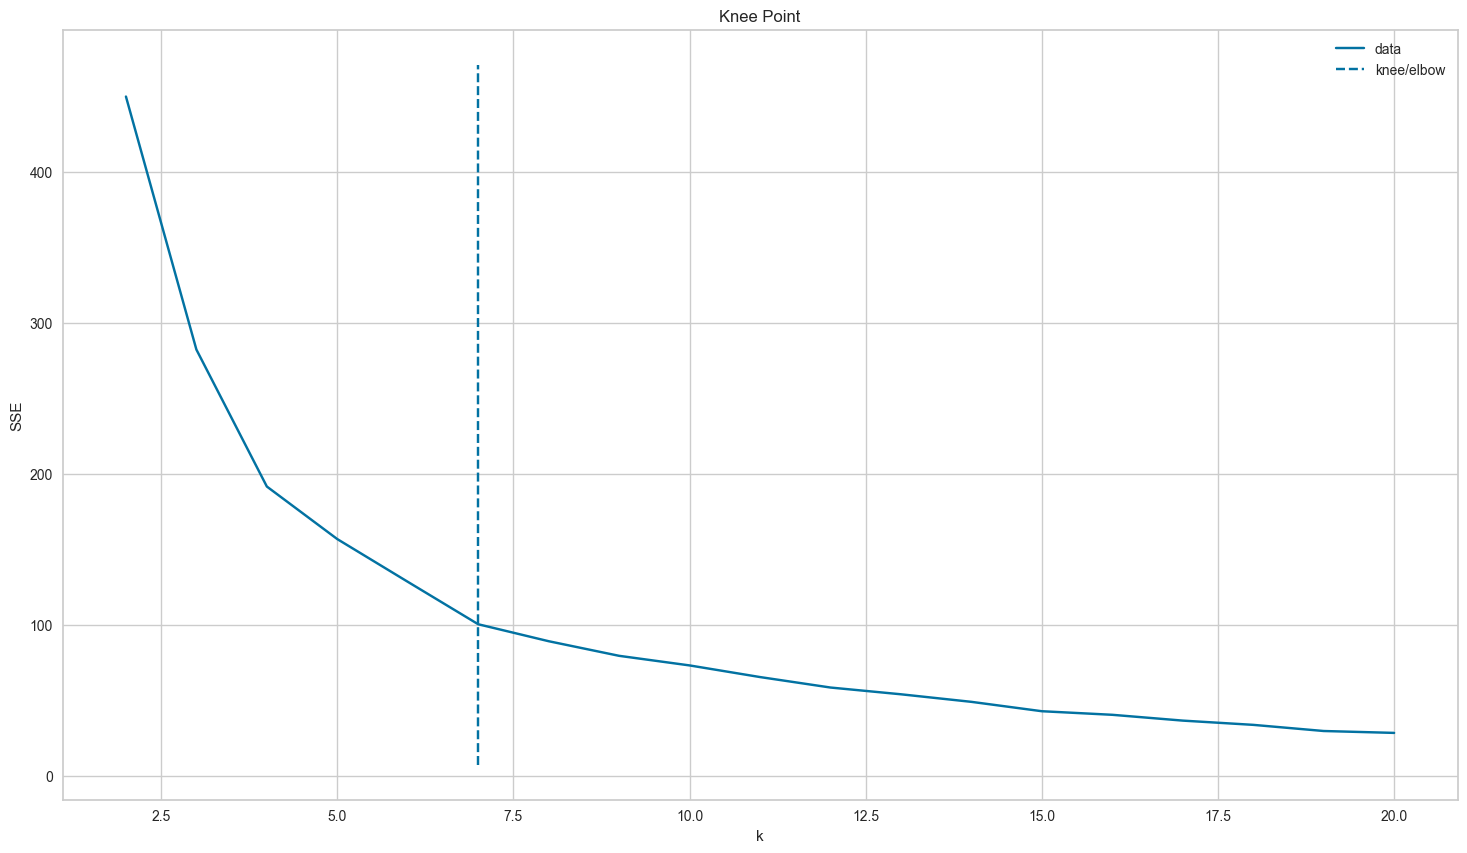

In [21]:
top_pca_k = find_k(top_2D, 2, 21)

In [22]:
top_pca_k

7

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

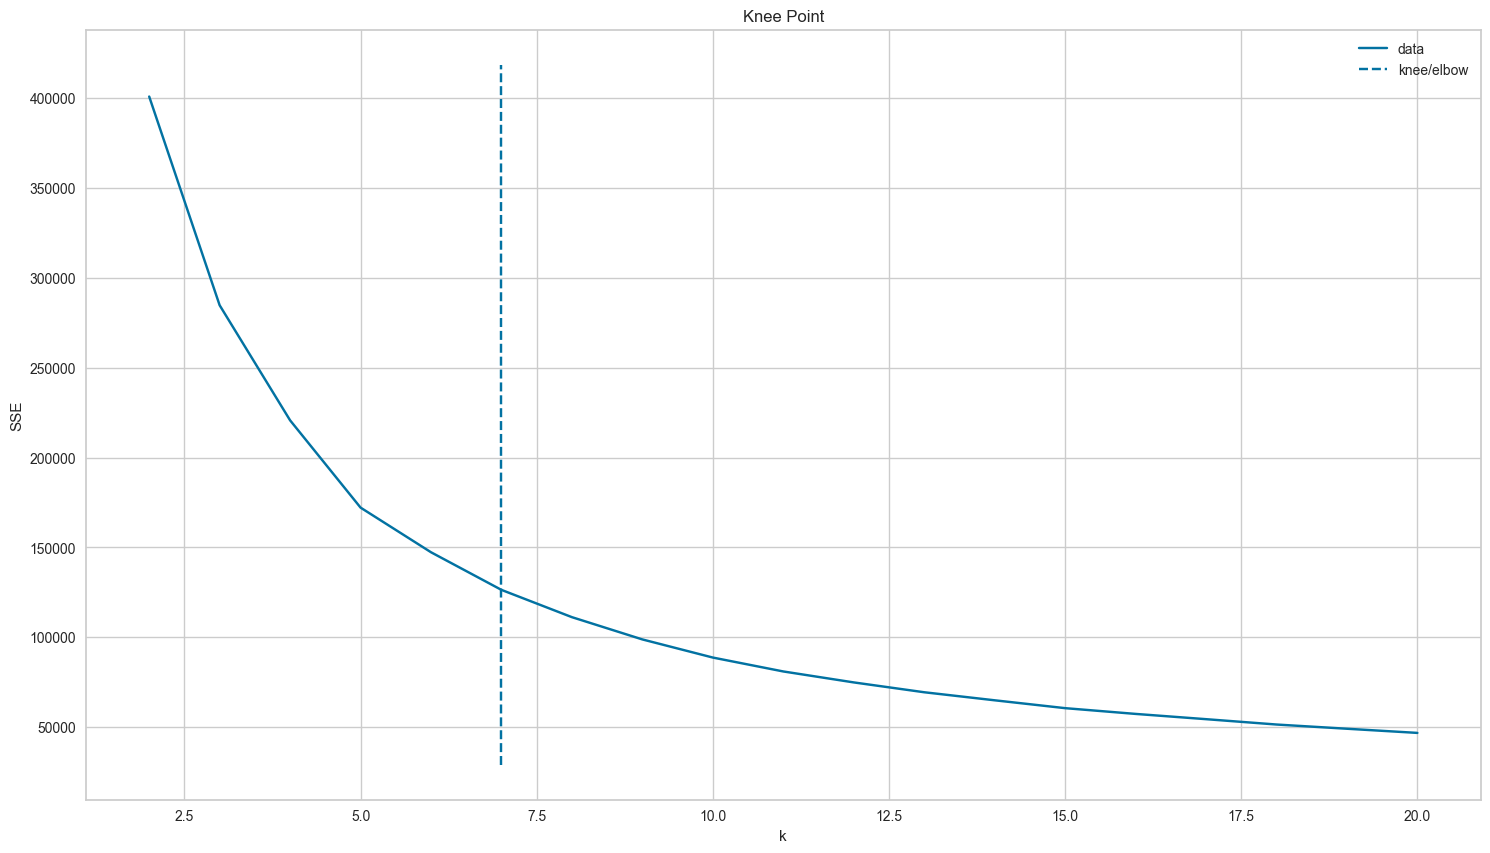

In [148]:
data_pca_k = find_k(data_2D, 2, 21)

In [150]:
data_pca_k

7

**Results for best k:**
- Scaled Data:
  - Top df : 9

  - Full df : 8
  
- PCA 2D:
  - Top df : 7

  - Full df : 7

#### MODEL

#### Top

##### K-MEANS

In [61]:
kmeans = KMeans(n_clusters=top_k, random_state=1)
kmeans.fit(top_scaled)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9, random_state=1)

In [62]:
# "performance metric" --> difficult to understand because it is not normalized
kmeans.inertia_

887.9495641172002

In [63]:
# Assigning the clusters:
clusters = kmeans.predict(top_scaled)
clusters

array([4, 1, 2, 2, 1, 7, 1, 7, 1, 3, 3, 8, 3, 1, 4, 8, 0, 3, 3, 4, 4, 7,
       7, 6, 4, 2, 1, 2, 2, 3, 4, 1, 1, 3, 5, 5, 1, 6, 4, 6, 1, 4, 2, 1,
       7, 7, 1, 3, 4, 2, 2, 4, 4, 4, 2, 1, 3, 1, 3, 3, 6, 1, 4, 4, 8, 7,
       3, 4, 3, 3, 3, 6, 1, 2, 1, 6, 3, 2, 1, 1, 7, 7, 2, 7, 2, 2, 6, 3,
       7, 4, 5, 6, 4, 7, 7, 6, 1, 4, 4, 1, 4, 6, 6, 3, 6, 2, 1, 1, 3, 4,
       2, 1, 7, 1, 0, 6, 1, 7, 8, 5, 2, 4, 4, 6, 3, 5, 2, 1, 6, 2, 1, 2,
       3, 2, 6, 1, 6, 6, 7, 6, 2, 1, 2, 1, 1, 1, 3, 1, 6, 6, 3, 1, 3, 7,
       2, 1, 2, 7, 6, 1, 6, 8, 2, 2], dtype=int32)

In [64]:
s = metrics.silhouette_score(top_scaled, clusters)
s

0.16246231337535771

In [163]:
def add_cluster_column(df_scaled, k):
    """Run KMeans clustering, and add cluster result to the dataframe. """
    
    model = KMeans(n_clusters=k, random_state=1, n_init=10)
    model.fit(df_scaled)
    return df_scaled.assign(cluster=model.labels_)

In [22]:
df_top = add_cluster_column(top_scaled, top_k)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [368]:
df_top.cluster.unique()

array([4, 1, 2, 7, 3, 8, 0, 6, 5], dtype=int32)

##### DBSCAN

In [43]:
## OPTION WITH FIT and LABELS_

model = DBSCAN(eps=0.5, min_samples=5) #Those are the values by default
model.fit(top_scaled)

labels = model.labels_ # label -1 means the point is an outlier
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

**DOESN'T WORK**

##### GAUSSIAN

In [80]:
model = GaussianMixture(n_components=9, random_state=1, n_init=10)
labels = model.fit_predict(top_scaled)
labels

array([7, 1, 1, 1, 1, 8, 1, 2, 1, 4, 4, 0, 4, 1, 1, 0, 6, 4, 4, 1, 7, 2,
       2, 3, 7, 4, 1, 4, 4, 4, 1, 1, 1, 4, 5, 5, 1, 3, 1, 4, 1, 1, 4, 1,
       8, 8, 1, 4, 7, 3, 3, 1, 7, 7, 4, 1, 4, 1, 4, 4, 8, 1, 1, 1, 0, 2,
       4, 7, 4, 1, 4, 1, 1, 4, 1, 1, 4, 1, 1, 1, 2, 2, 4, 8, 4, 4, 4, 4,
       8, 1, 5, 8, 1, 8, 2, 3, 1, 1, 1, 1, 1, 1, 4, 4, 1, 4, 1, 1, 4, 7,
       4, 1, 8, 1, 6, 7, 1, 8, 0, 5, 1, 7, 7, 3, 4, 5, 4, 1, 4, 4, 1, 4,
       4, 4, 4, 1, 3, 4, 1, 1, 3, 1, 4, 1, 1, 4, 4, 1, 3, 1, 4, 1, 4, 8,
       4, 1, 1, 8, 8, 1, 1, 0, 4, 4])

In [75]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [57]:
s = metrics.silhouette_score(top_scaled, labels)
s

0.10942715736945963

In [55]:
s_pca = metrics.silhouette_score(top_2D, labels)
s_pca

0.26737159821190076

#### DATA

In [24]:
df_data = add_cluster_column(data_scaled, data_k)

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [25]:
df_data.cluster.unique()

array([0, 5, 6, 7, 1, 2, 4, 3], dtype=int32)

In [26]:
#df_top.to_csv('top_songs_scaled_clustered.csv', index=False)

In [27]:
#df_data.to_csv('full_data_scaled_clustered.csv', index=False)

### VISUALIZING THE CLUSTERS

In [151]:
def visual_clusters(df, k, model, min_sample=5):
    '''This function transforms a dataframe into a 2-dimension pca, performs the clustering model, and shows a visualization of the clusters.
    # parameters
    df : dataframe to use. preferably already cleaned and scaled
    k : number of clusters chosen
    model : choose model between kmeans, dbscan or gaussian
    min_sample : default value is 5. this optional parameter can be changed if needed.
    '''
    
    # pca transformation
    pca = PCA(2) 
    df_2D = pca.fit_transform(df)
    
    #models
    if model == 'kmeans':
        model = KMeans(n_clusters=k, random_state=1, n_init=10)
        
    elif model =='dbscan':
       model = DBSCAN(eps=0.5, min_samples=min_sample) 
    
    elif model == 'gaussian':
        model = GaussianMixture(n_components=k, random_state=1, n_init=10, init_params='kmeans')
        
    else:
        print("model chosen unavailable. please input kmeans or gaussian")
    
    clusters =  model.fit_predict(df_2D)
    
    # visualization
    legend = np.unique(clusters)

    for i in legend:
        plt.scatter(df_2D[clusters == i , 0] , df_2D[clusters == i , 1] , label = i)
    
    plt.legend()
    plt.show()
    # silhouette score
    
    s = metrics.silhouette_score(df_2D, clusters)
    return clusters, s.round(2)

#### TOP

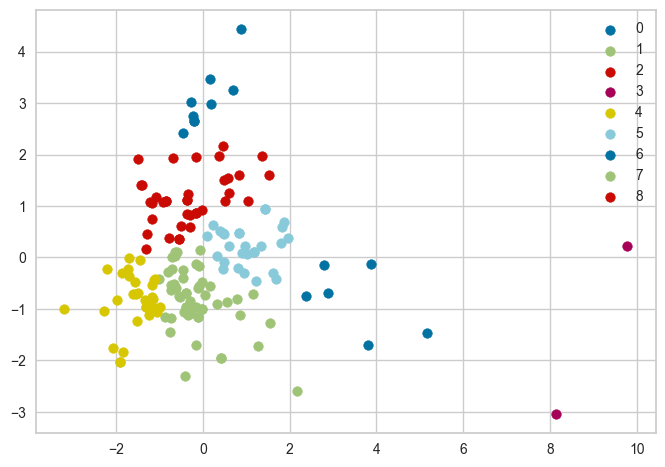

In [128]:
top_clusters_9k, s_top9k = visual_clusters(top_scaled, top_k, 'kmeans')

In [130]:
s_top9k

0.38

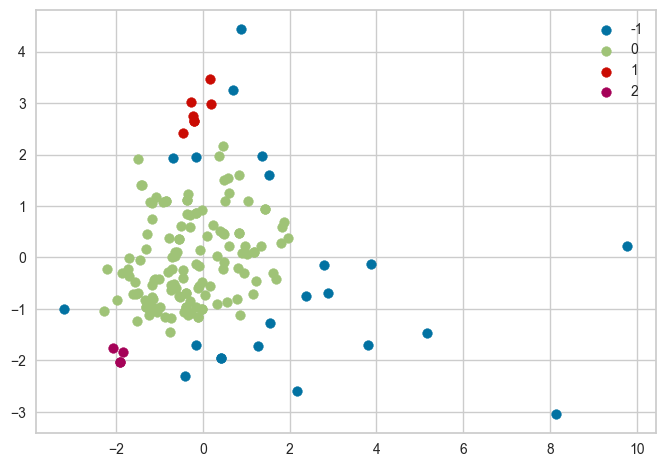

In [131]:
top_clusters_9d,  s_top9d= visual_clusters(top_scaled, top_k, 'dbscan', min_sample=3)

In [132]:
s_top9d

0.17

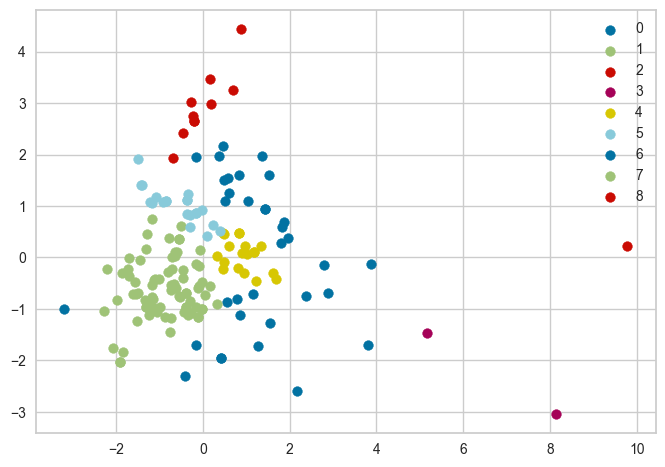

In [133]:
top_clusters_9g, s_top9g = visual_clusters(top_scaled, top_k, 'gaussian')

In [134]:
s_top9g

0.27

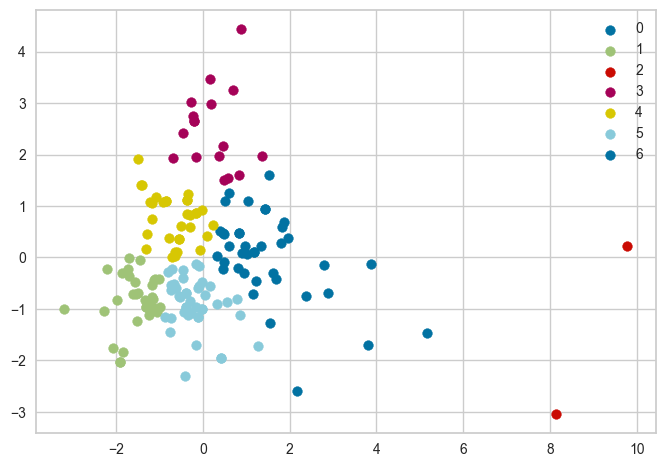

In [153]:
top_clusters_7k, s_top7k = visual_clusters(top_scaled, top_pca_k, 'kmeans')

In [154]:
s_top7k

0.39

#### DATA

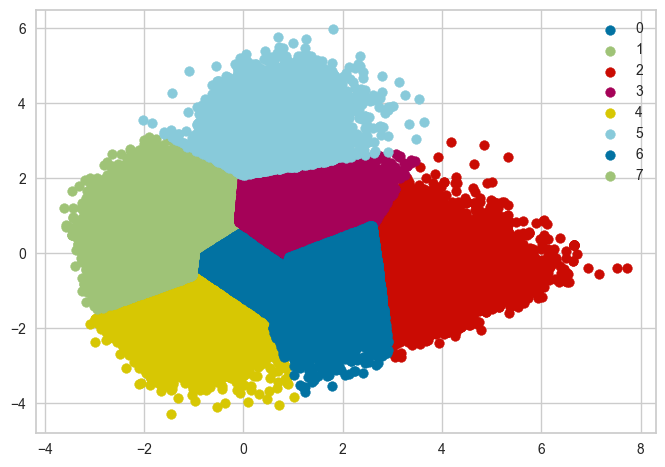

In [138]:
fulldata_8k, s_full8k = visual_clusters(data_scaled, data_k, 'kmeans')

In [140]:
s_full8k

0.33

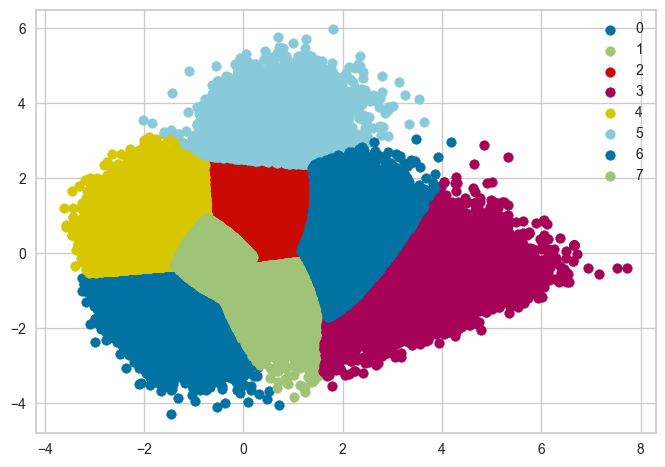

In [141]:
fulldata_8g, s_full8g = visual_clusters(data_scaled, data_k, 'gaussian')

In [142]:
s_full8g

0.32

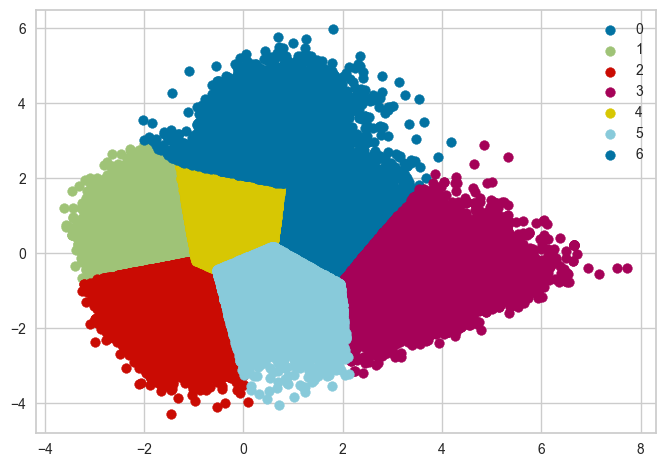

In [155]:
fulldata_7k, s_full7k = visual_clusters(data_scaled, data_pca_k, 'kmeans')

In [156]:
s_full7k

0.35

**Best silhouette score using previous best k from elbow plot:** 
  - Top df : k = 7, s = 39

  - Full df : k = 7, s = 0.35

#### USING SILHOUETTE SCORE TO LOOK FOR BEST K

In [144]:
def plot_silhouette(df, start, end):
    K = range(start, end)

    silhouette = []

    for k in K:
        kmeans = KMeans(n_clusters=k, random_state=1)
        kmeans.fit(df)
        silhouette.append(silhouette_score(df, kmeans.predict(df)))    

    # plot
    plt.figure(figsize=(16,8))
    plt.plot(K, silhouette, 'bx-')
    plt.xlabel('k')
    plt.ylabel('silhouette score')
    plt.xticks(np.arange(min(K), max(K)+1, 1.0))
    plt.show()

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

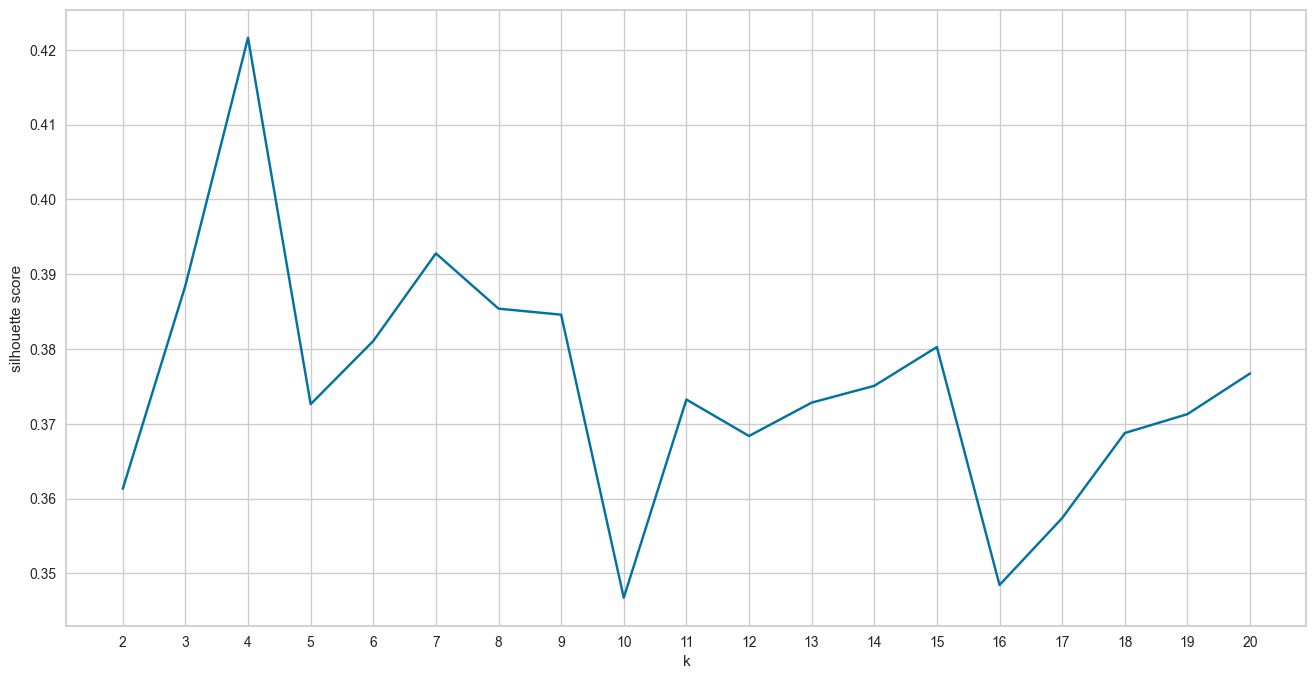

In [159]:
plot_silhouette(top_2D, 2, 21)

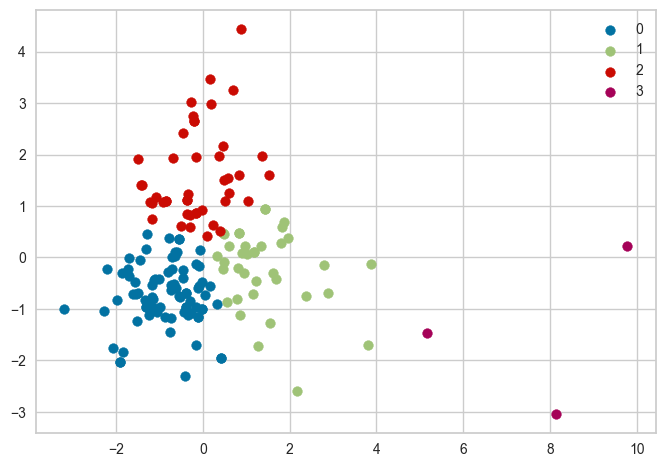

In [160]:
s_top_cluster, s_top_7k = visual_clusters(top_2D, 4, 'kmeans')

In [161]:
s_top_7k

0.42

/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/clust

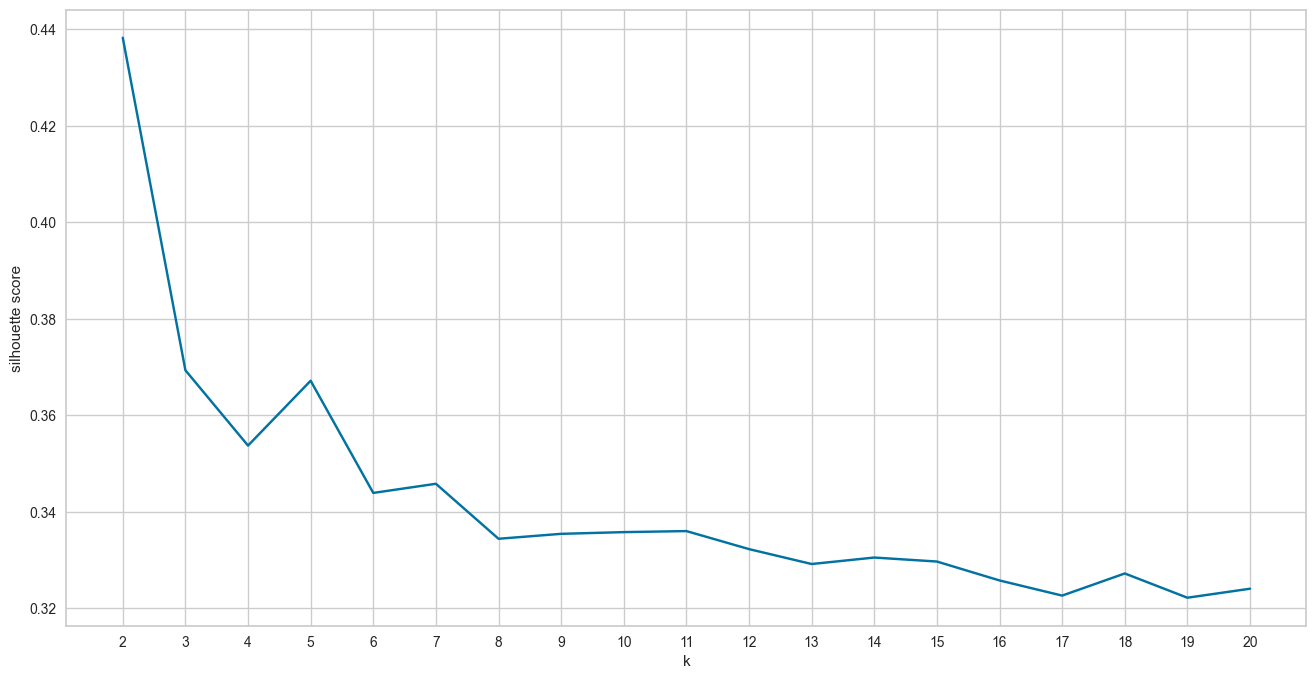

In [162]:
plot_silhouette(data_2D, 2, 21)

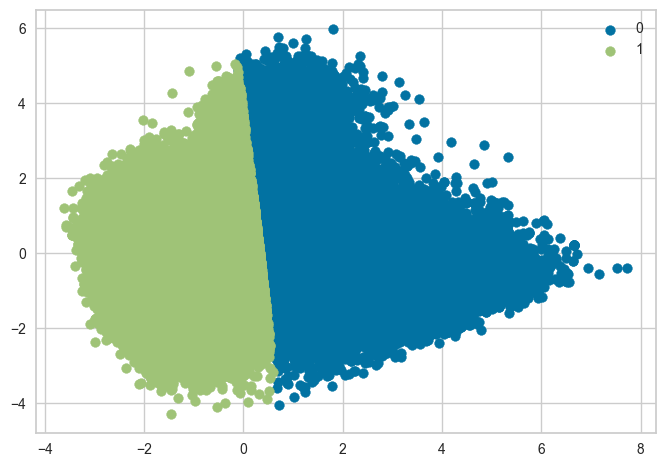

In [164]:
fulldata_2k, s_full2k = visual_clusters(data_scaled, 2, 'kmeans')

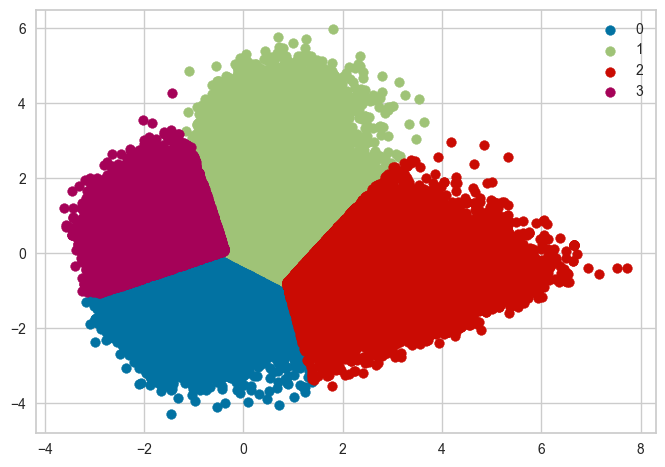

In [165]:
fulldata_4k, s_full4k = visual_clusters(data_scaled, 4, 'kmeans')

**Looking at k from 2 to 10:**
- We arrive at the same result for the best k for the top dataset : 9.
- However, we can see the silhouette score for the best k of the full data dataset doesn't align with the highest.
  - To take a better look at the cluster visualization, we will try out different clusters.
  - Above, we can see that more clusters will lead to better partioning of the dataset. If we have more time to work on this, it would be ideal to look at larger iterations for looking for the best k just to see if having more clusters or "genre" would be better in determining more accurately which songs are similar. This in turn will provide better recommendation to users.

### TRYING OUT SILHOUETTE VISUALIZER

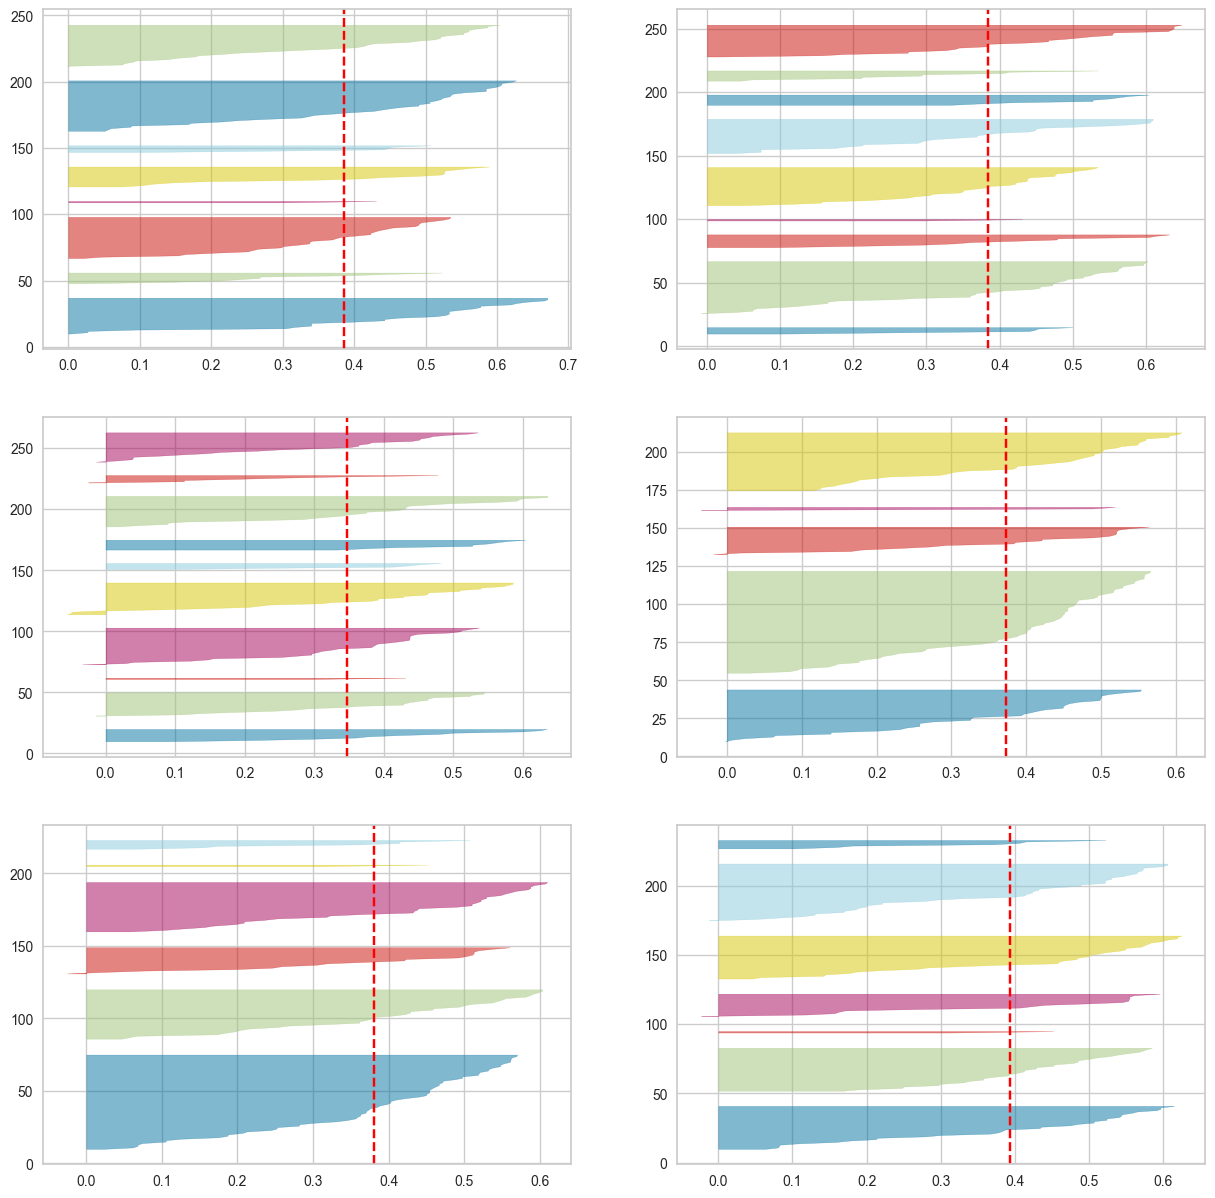

In [346]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))
for i in [5,6,7,8,9,10]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=1)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-4][mod])
    visualizer.fit(top_2D)

**Also tried doing the silhouette visualizer.**
- We can see that only k=8 doesn't have below 0 silhouette.

In [63]:
def silhouette_viz(df, start, end):
    rows = round((end-start)/2)
    fig, ax = plt.subplots(rows, 2, figsize=(15,rows*5))
    for i in range(start, end):
        '''
        Create KMeans instance for different number of clusters
        '''
        km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=1)
        q, mod = divmod(i, 2)
        '''
        Create SilhouetteVisualizer instance with KMeans instance
        Fit the visualizer
        '''
        visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-round(start/2)][mod])
        visualizer.fit(df)

In [139]:
silhouette_viz(data_2D, 5, 11)

NameError: name 'silhouette_viz' is not defined

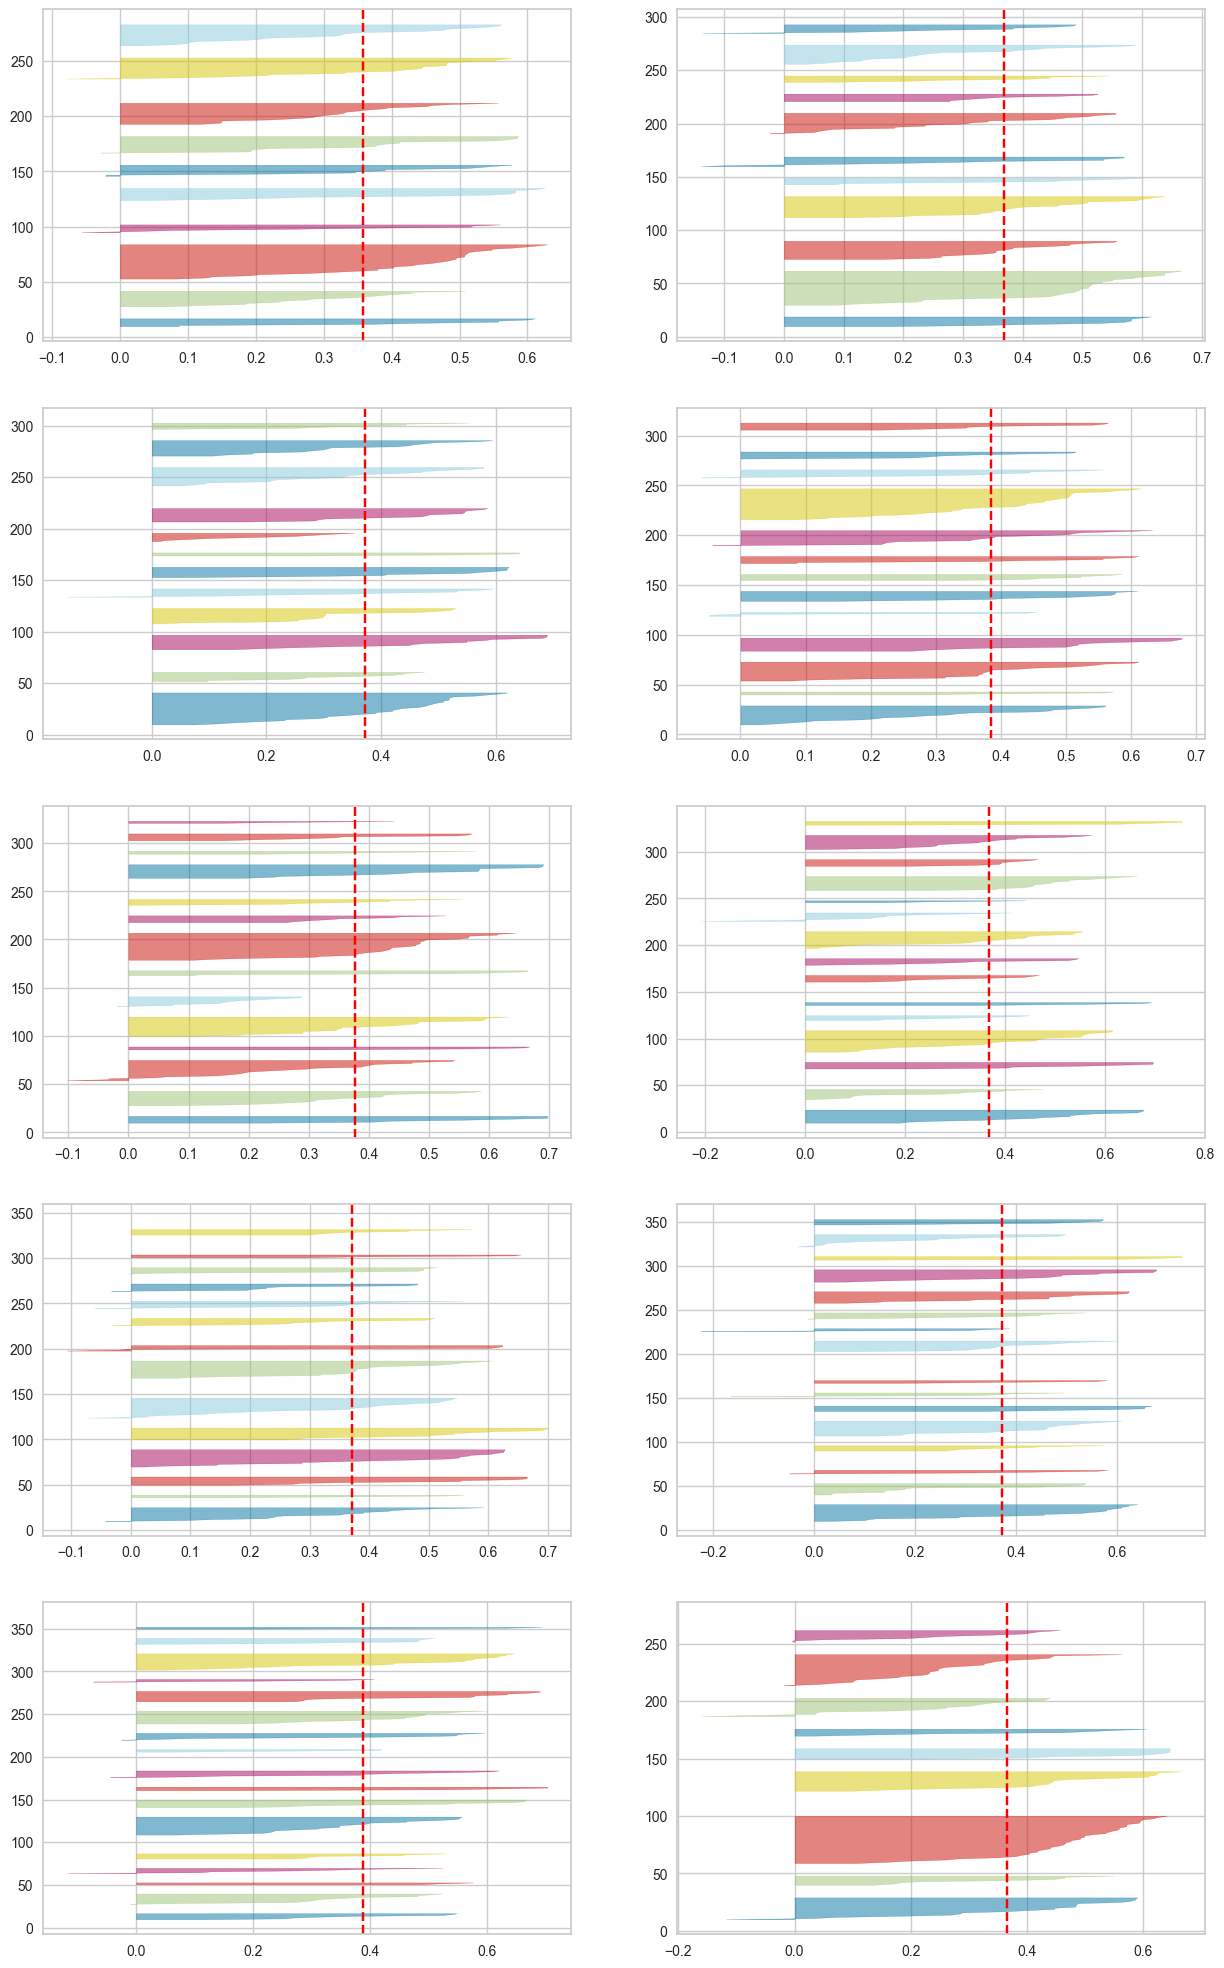

In [62]:
silhouette_viz(top_2D, 11, 21)